###HW_5_ASSIGNMENT 1
###Author Anita Ahmed - ama908@nyu.edu

####PROBLEM STATEMENT: In this notebook we are trying to find correlation between the energy consumed by a building to number of units in that building. 
####To get information on energy usage we use the following CSV File 

####Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv

####To get information on the number of units in a building we use the following shape File(Manhattan) 

####mn_mappluto_15v1\Manhattan\MNMapPLUTO.shp

In [19]:
#Importing Packages
import geopandas as gp
import pandas as pd
import os
import json
import csv
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [20]:
#Importing the CSV File containing energy usage information and printing the column headers
s = open("C:\Users\Anita_2\Documents\Prin_of_Urban_Informatics\PUI2015\Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
nrg = gp.GeoDataFrame.from_csv(s)
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [25]:
#Importing the SHP File containing information on number of units in buildings in Manhattan
#and printing the column headers
bsize = gp.GeoDataFrame.from_file("C:\Users\Anita_2\Documents\Prin_of_Urban_Informatics\PUI2015\Manhattan\MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000449AD908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A0F3320>]], dtype=object)

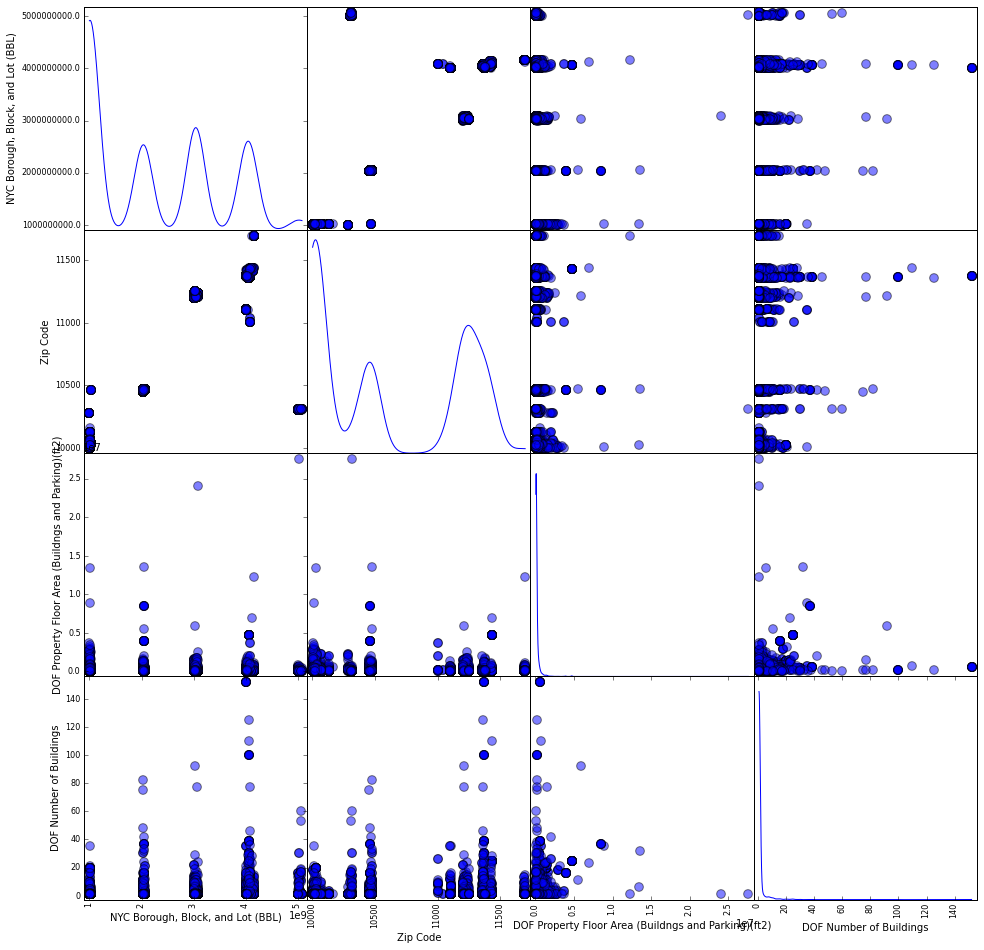

In [26]:
#plotting all the columns that have number entries,allowing pandas to choose which columns that 
#can plotted
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

From the scatter plots we can only see that pandas was able to plot and correlate 4 columns only, but to get the energy usage data we need to read Site EUI(kBtu/ft2) and DOF Property Floor Area (Buildngs and Parking)(ft2). So we create the following function to convert the column values to float and if non-convertable assign an NaN value to them.

In [27]:
# Function to return true if value is float convertable, otherwise false
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [28]:
# Creating indexed arrays for columns of interest
indxSEUI=(np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)'])) 
nrg.loc[~indxSEUI, 'Site EUI(kBtu/ft2)'] = float('NaN')

indxFA=( np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
nrg.loc[~indxFA, 'Reported Property Floor Area (Building(s)) (ft²)'] = float('NaN')

In [29]:
# Checking if the convrersion worked
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print bsize.BBL.astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In order to correlate unit sizes and energy consumption we need to merge the two data sets we are using. We found BBL as the common column for the two datasets. 

In [30]:
#Merging energy data with building data through BBL
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'] 
bblnrg = pd.merge(nrg, bsize, how='inner', on=['BBL'])
print bblnrg.columns

C:\Users\Anita_2\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
C:\Users\Anita_2\Anaconda\lib\site-packages\pandas\core\index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


Index([                  u'NYC Borough, Block, and Lot (BBL)',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

In [31]:
# Calculating the total energy consumption per building
bblnrg['totalNrg'] = bblnrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)*bblnrg['Site EUI(kBtu/ft2)'].astype(float)

C:\Users\Anita_2\Anaconda\lib\site-packages\pandas\core\index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


####Natural Scatter Plot

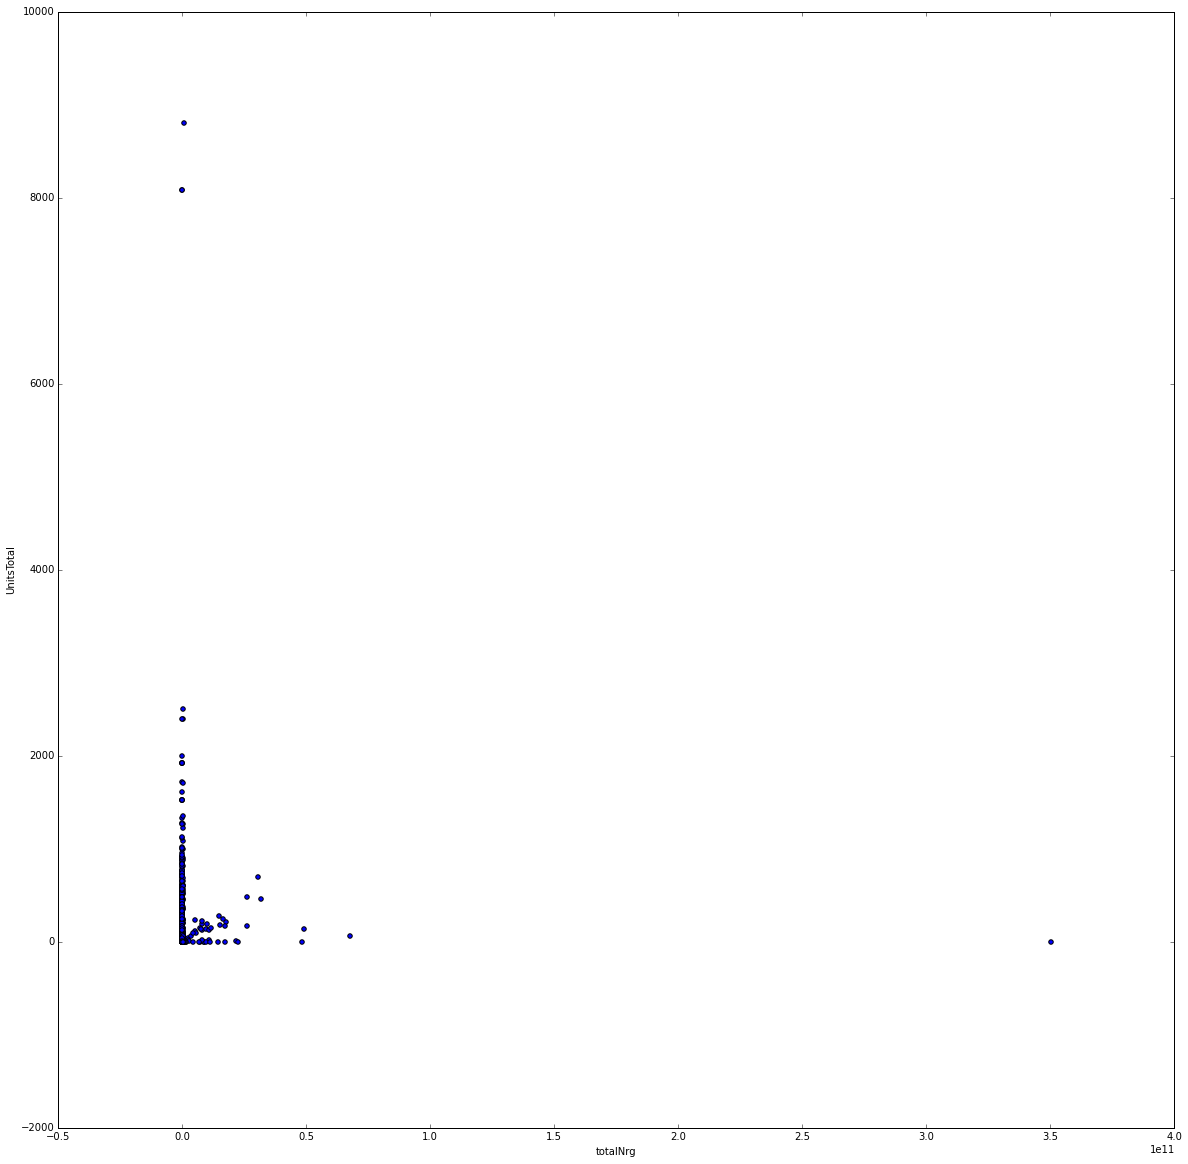

In [32]:
bblnrg.plot(kind='scatter',x='totalNrg',y='UnitsTotal', marker='o', figsize=(20, 20))

#### LOG Scatter Plot

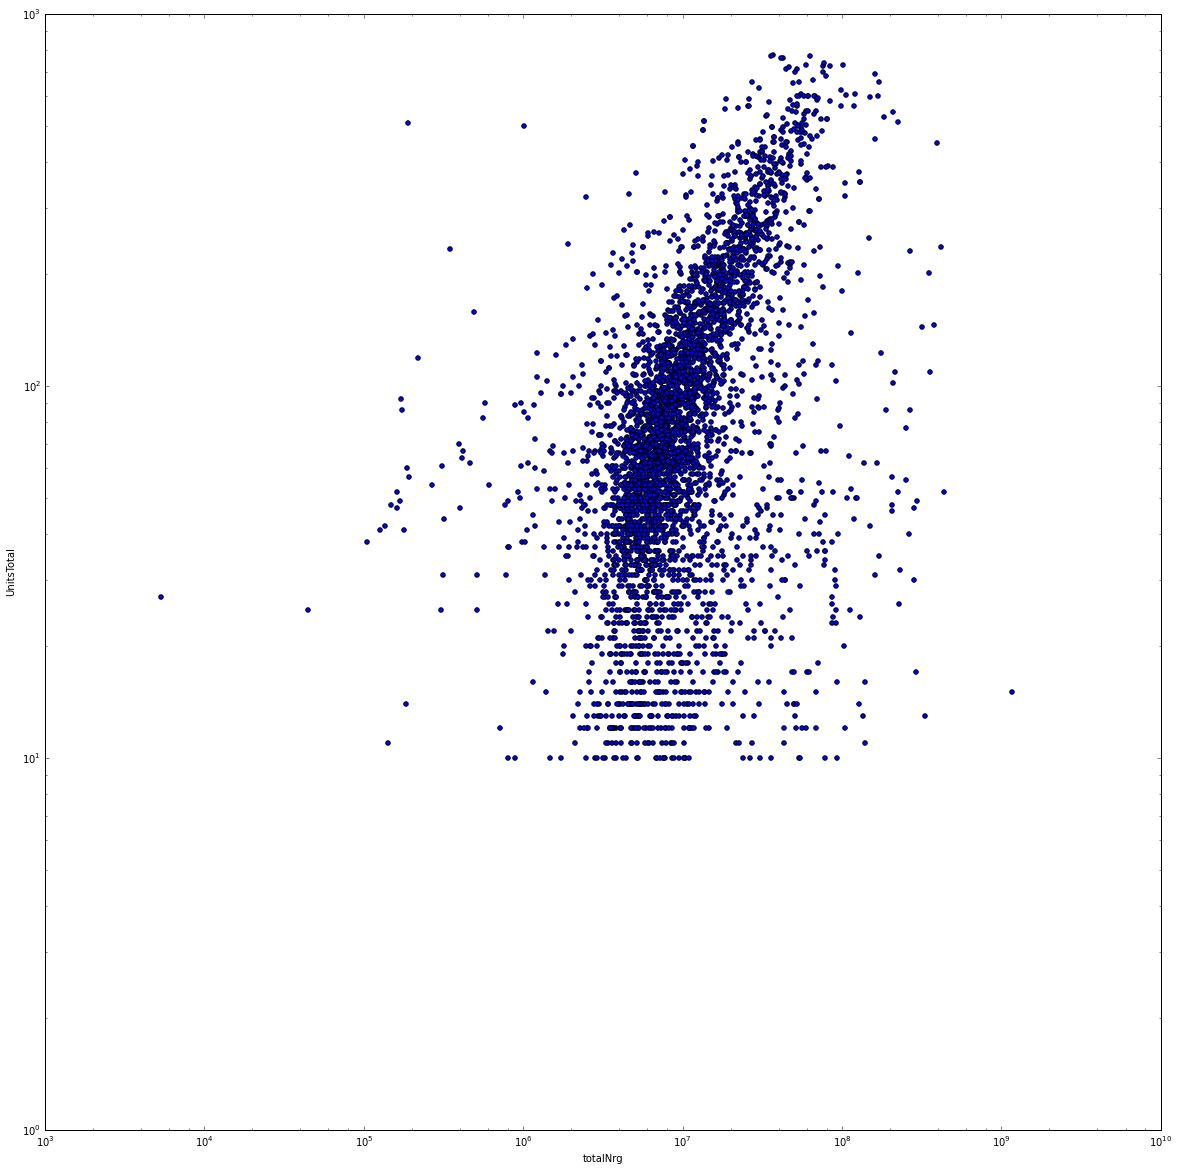

In [33]:
# Since the 'natural' scatter plot doesn't give is a lot of information and is widely spread we create
#a subset of data where most data points are 
bblnrg_cut = bblnrg[(bblnrg.totalNrg > 1000) & (bblnrg.totalNrg < .2e10) & (bblnrg.UnitsTotal>=10) & (bblnrg.UnitsTotal<800)]
# We do a LOG scatter plot for the subset data
bblnrg_cut.plot(kind='scatter',x='totalNrg',y='UnitsTotal', marker='o',  figsize=(20, 20), loglog=True)

##Fitting Line through Log of the variables
#### First We use No of Units as Independent Variable and Energy Usage as Dependent Variable

In [34]:
UnitsTotal = np.log10(bblnrg_cut['UnitsTotal'])
totalNrg = np.log10(bblnrg_cut['totalNrg'])
X = sm.add_constant(UnitsTotal)
model = sm.OLS(totalNrg, X, missing='drop') # ignores entires where x or y is NaN
fit = model.fit()
print fit.summary()


                            OLS Regression Results                            
Dep. Variable:               totalNrg   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     957.3
Date:                Mon, 19 Oct 2015   Prob (F-statistic):          1.53e-189
Time:                        22:39:19   Log-Likelihood:                -1763.4
No. Observations:                4203   AIC:                             3531.
Df Residuals:                    4201   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1607      0.028    221.208      0.0

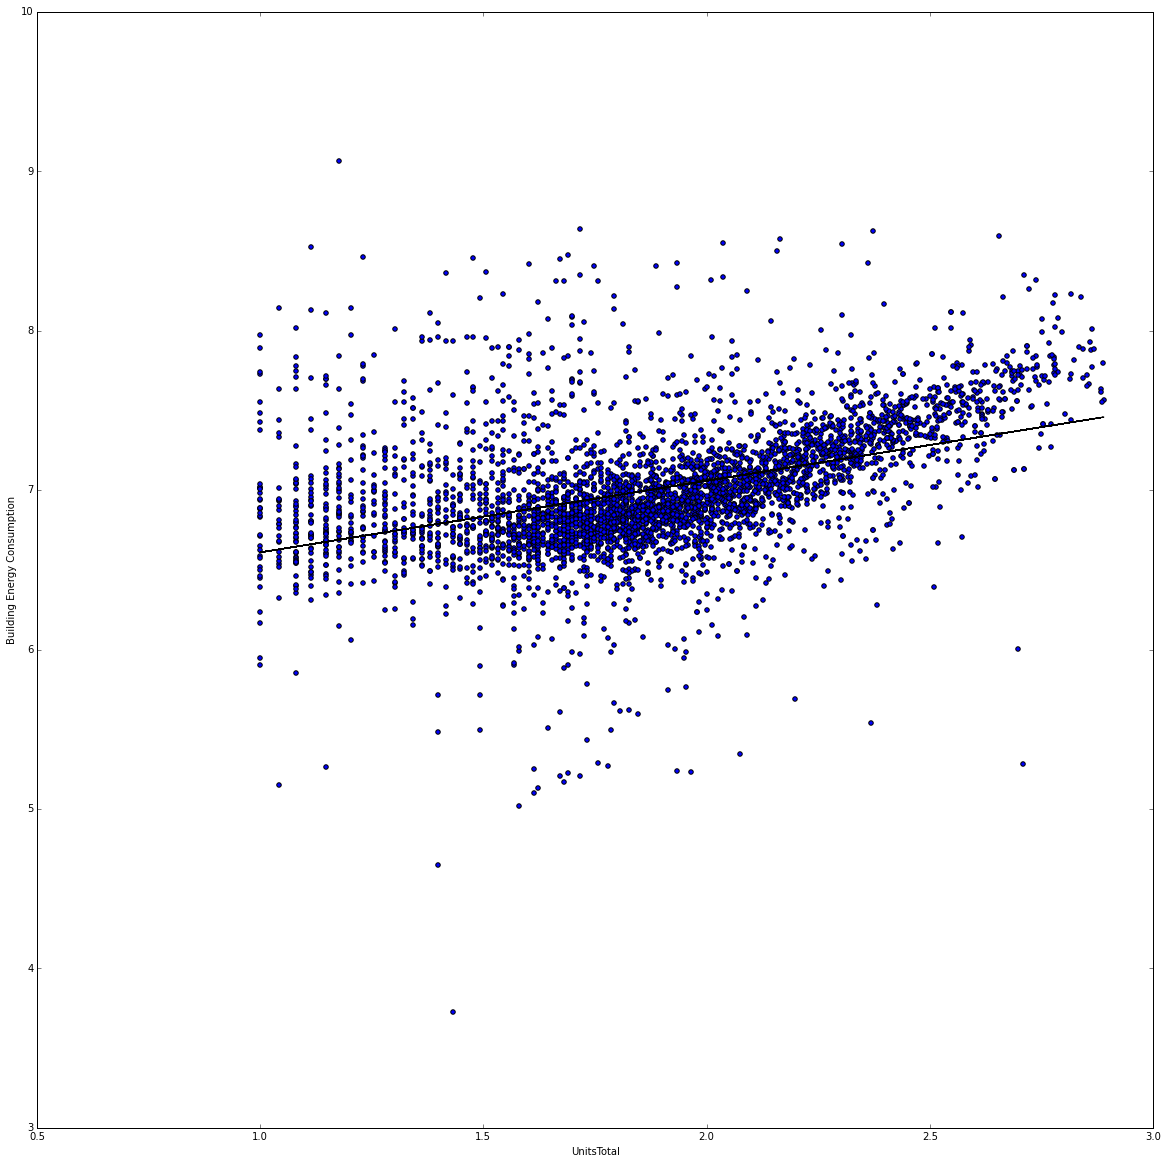

In [35]:
pl.figure(figsize=(20, 20))
pl.scatter(UnitsTotal, totalNrg)
plot(UnitsTotal, fit.predict(), 'k')
pl.ylabel('Building Energy Consumption')
pl.xlabel('UnitsTotal')

#### Now We use Energy Usage as Independent Variable and No of Units as Dependent Variable

In [36]:
X2 = sm.add_constant(totalNrg)
model2 = sm.OLS(UnitsTotal, X2, missing='drop') # ignores entires where x or y is NaN
fit2 = model2.fit()
print fit2.summary()

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     957.3
Date:                Mon, 19 Oct 2015   Prob (F-statistic):          1.53e-189
Time:                        22:39:19   Log-Likelihood:                -1590.6
No. Observations:                4203   AIC:                             3185.
Df Residuals:                    4201   BIC:                             3198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0165      0.094    -10.843      0.0

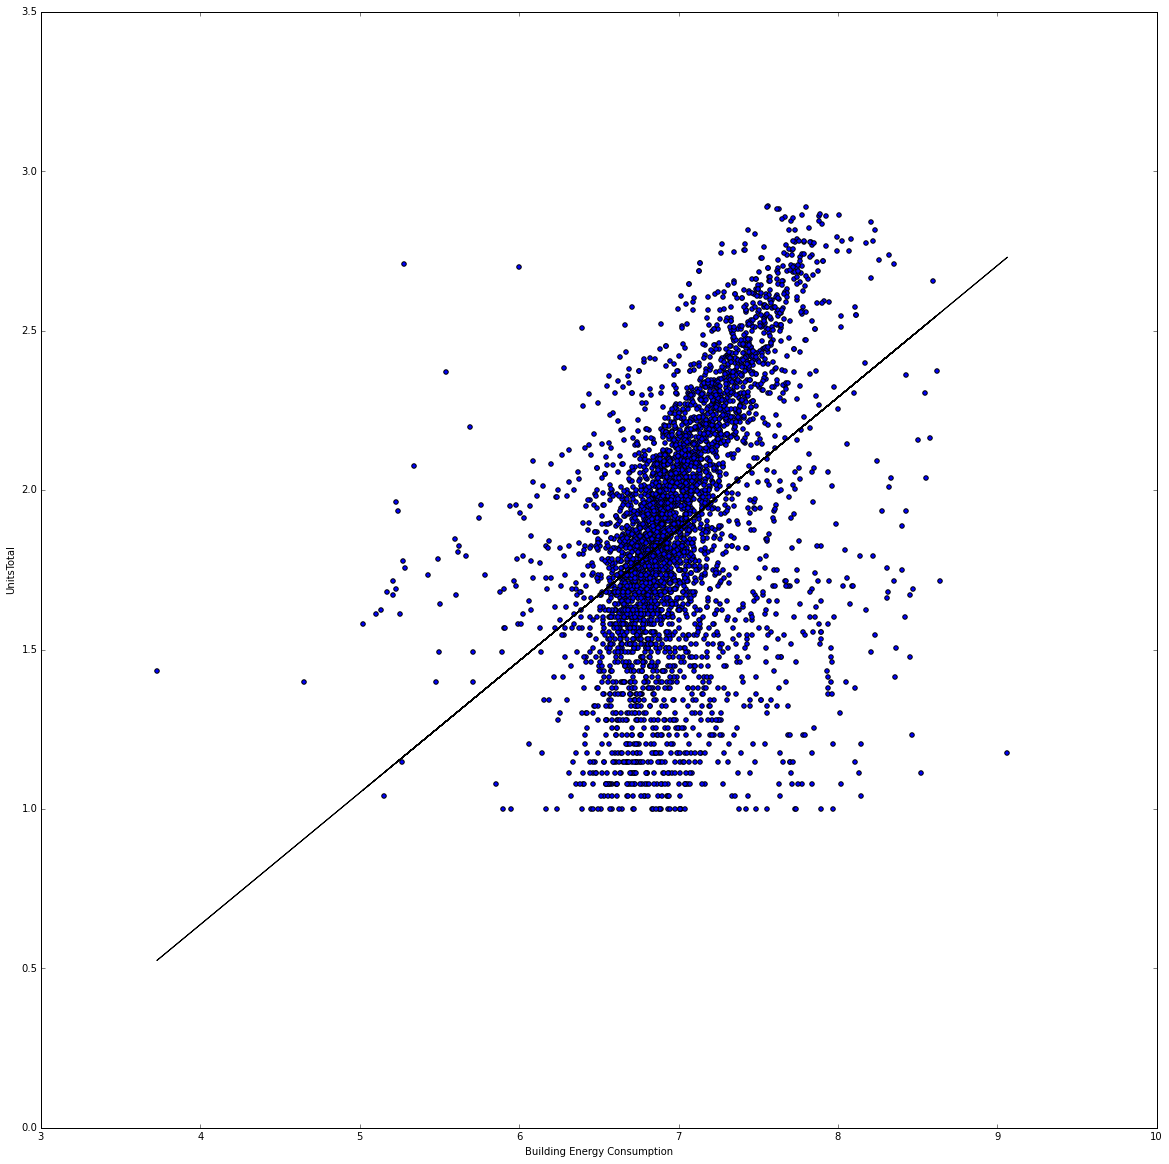

In [37]:
pl.figure(figsize=(20, 20))
pl.scatter(totalNrg,UnitsTotal)
plot(totalNrg, fit2.predict(), 'k')
pl.xlabel('Building Energy Consumption')
pl.ylabel('UnitsTotal')

###Look at the fit summary: which is better?
####According to the Test Summaries we see that the R-Statistic for both plots are the same, which indicates both regression line approximates the real data points equally.
####From the two plots it looks like the regression line fits the data better when the No of Units is the independent variable and the Energy Consumption is the dependent variable.
###Could you do a likelihood ratio test here? why or why not??
####We can't do a likelihood ratio test here because the model have the same number of parameters and hence degrees of freedom. There for both models are general models and not a simpler version of the other.
##Now we fit a second degree curve to variables; y: ax^2+bx+c
#### We use No of Units as Independent Variable and Energy Usage as Dependent Variable

In [38]:
#Regression Summary
model4 = smf.ols(formula='totalNrg ~ UnitsTotal + I(UnitsTotal**2)', data = bblnrg_cut)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               totalNrg   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     171.0
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           3.84e-72
Time:                        22:39:20   Log-Likelihood:                -78641.
No. Observations:                4203   AIC:                         1.573e+05
Df Residuals:                    4200   BIC:                         1.573e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            1.15e+07   9.59e+05     11.984      0.000      9.62e+06  1.34e+07
UnitsTotal          2.447e+04   1.16e+04      2.109      0.035      1720.364  4.72e+04
I(UnitsTotal ** 2)   107.2429     21.673      4.948      0.000        64.751   149.734
==============================================================================
Omnibus:                     8239.394   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29952722.967
Skew:                          15.235   Prob(JB):                         0.00
Kurtosis:                     415.441   Cond. No.                     1.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
b2, b1, b0 = np.polyfit(UnitsTotal, totalNrg, 2)
print b0, b1, b2

8.12062718249 -1.72623388202 0.577401622795


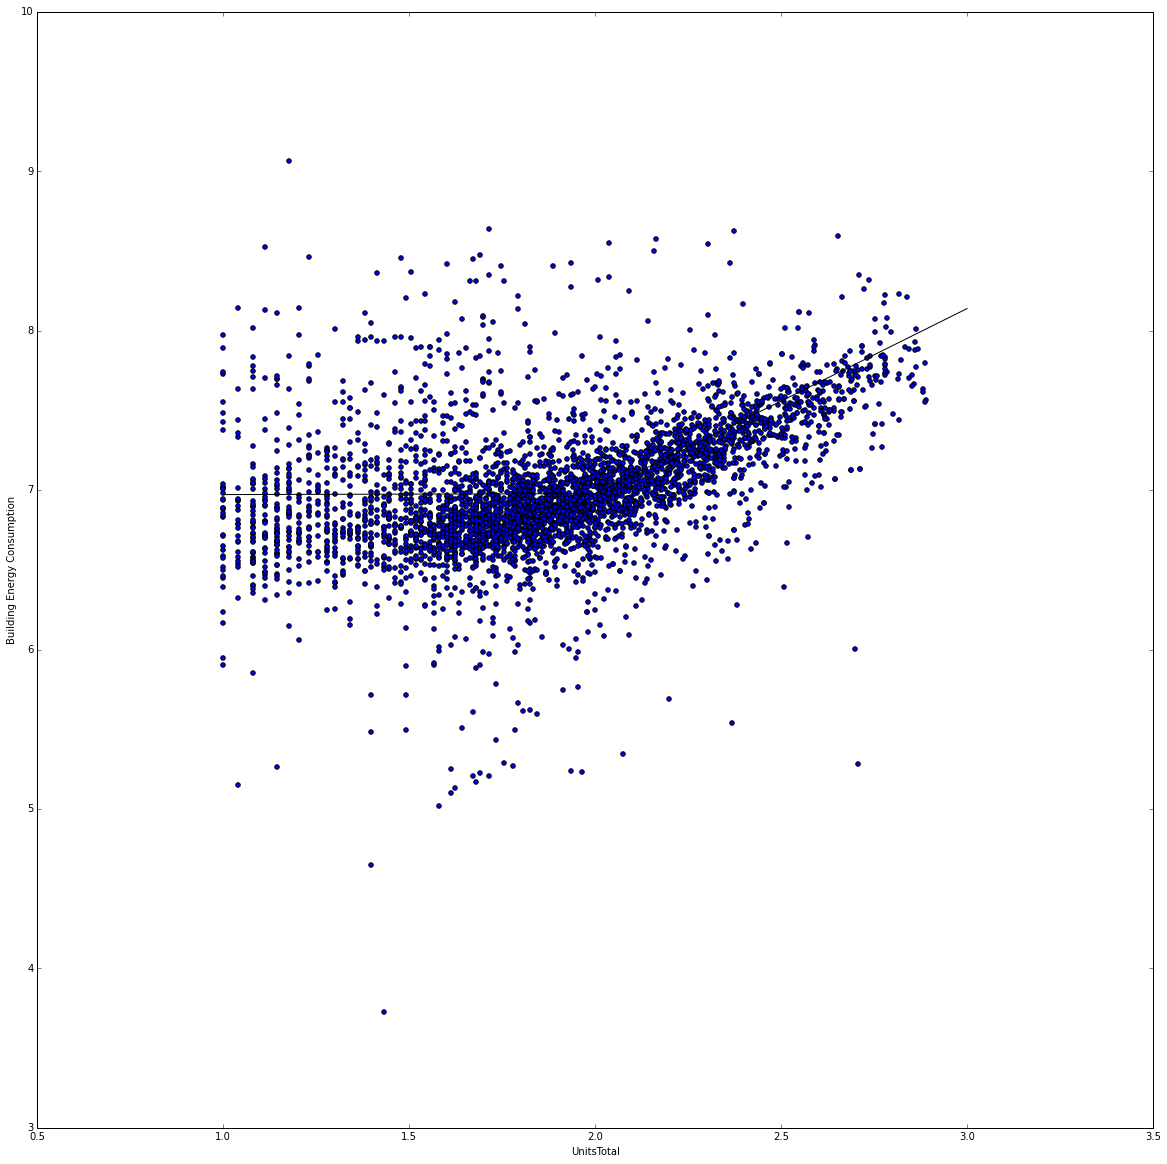

In [40]:
#Plotting the second degree linear regression line
x_dummy = np.arange(1,4,1)
y_predicted = b2*x_dummy**2 + b1*x_dummy + b0

pl.figure(figsize=(20, 20))
pl.scatter(UnitsTotal,totalNrg)
pl.plot(x_dummy,y_predicted, 'k')
pl.xlabel('UnitsTotal')
pl.ylabel('Building Energy Consumption')

###Look at the fit summary: which is better?
####Comparing the Test Summaries we see that the R-Statistic for the second degree linear regression is greater than the first degree linear regression. Therefore we can conclude the second degree linear curve fits the data better. 
###Could you do a likelihood ratio test here? why or why not??
####Yes we can do a likelihood ratio test as the degree of freedom is 2 for the second degree linear regression and the degree of freedom is one for the first degree of linear regression. 